## RNN with the stock price prediction
dataset: 
https://www.kaggle.com/datasets/camnugent/sandp500

Task: Based on data, build an RNN model to predict stock prices:
1. Complete data preprocessing and convert sequence data into data that can be used for RNN input
2. Predict the new data test set and visualize the results
3. Store the prediction results and observe the local prediction results

Remarks: Model structure: single-layer RNN, with 5 neurons at the output; 
use the first 8 data to predict the 9th data each time


In [58]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/all_stocks_5yr.csv")
data.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [59]:
price = data.loc[:, "close"]
price.head()

0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
Name: close, dtype: float64

In [60]:
# Normalization
price_norm = price/max(price)
price_norm.head()


0    0.007199
1    0.007057
2    0.006964
3    0.007155
4    0.006828
Name: close, dtype: float64

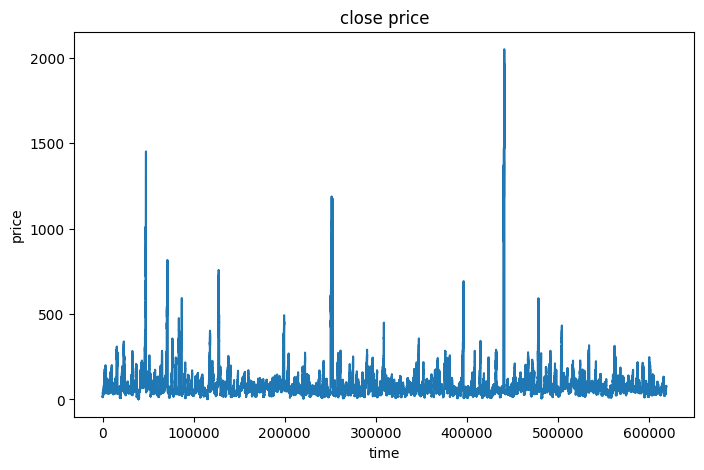

In [ ]:
from matplotlib import pyplot as plt
fig0 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()


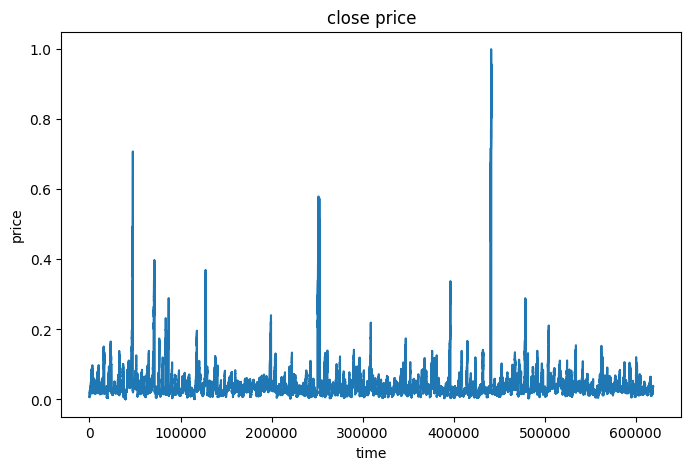

In [62]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price_norm)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()# define X and y


In [63]:


# Define method to extract X and y
def extract_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])  # Collect data in the list
        y.append(data[i + time_step])
    X = np.array(X)  # Convert to numpy array after collecting data
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape X to (samples, time_step, features)
    y = np.array(y)  # Convert y to numpy array
    return X, y

In [64]:
time_step = 8

In [65]:
#define X and y
X, y = extract_data(price_norm, time_step)

print(X.shape)


(619032, 8, 1)


In [66]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [67]:
print(X.shape, len(y))
print(X_train.shape)  # (samples_train, time_step, features)
print(X_test.shape)   # (samples_test, time_step, features)
print(y_train.shape)  # (samples_train,)
print(y_test.shape)   # (samples_test,)

(619032, 8, 1) 619032
(495225, 8, 1)
(123807, 8, 1)
(495225,)
(123807,)


In [68]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential()
#add RNN layers
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))
#add output layer
model.add(Dense(units=1, activation='linear'))
# configure the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [69]:
#train the model 
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
15476/15476 [==============================] - 10s 648us/step - loss: 1.7734e-05
Epoch 2/100
15476/15476 [==============================] - 11s 684us/step - loss: 7.6817e-06
Epoch 3/100
15476/15476 [==============================] - 10s 667us/step - loss: 7.0670e-06
Epoch 4/100
15476/15476 [==============================] - 11s 738us/step - loss: 7.0367e-06
Epoch 5/100
15476/15476 [==============================] - 11s 731us/step - loss: 7.0634e-06
Epoch 6/100
15476/15476 [==============================] - 10s 674us/step - loss: 7.0570e-06
Epoch 7/100
15476/15476 [==============================] - 10s 648us/step - loss: 7.0710e-06
Epoch 8/100
15476/15476 [==============================] - 10s 643us/step - loss: 7.0521e-06
Epoch 9/100
15476/15476 [==============================] - 10s 647us/step - loss: 7.0383e-06
Epoch 10/100
15476/15476 [==============================] - 10s 648us/step - loss: 6.9643e-06
Epoch 11/100
15476/15476 [==============================] - 10s 663us

In [ ]:
# make predictions based on the training data
y_train_predict = model.predict(X) * max(price)
y_train = [i*max(price) for i in y]
# print(y_train_predict, y_train)

19345/19345 [==============================] - 6s 296us/step
[[12.641748]
 [12.747324]
 [12.954144]
 ...
 [76.29533 ]
 [73.22125 ]
 [72.82137 ]] [13.37, 13.57, 13.02, 13.26, 13.41, 13.43, 13.61, 13.9, 14.05, 14.57, 14.82, 14.92, 15.13, 15.5, 15.91, 16.25, 15.98, 16.29, 16.78, 17.23, 17.0, 16.86, 16.6, 16.51, 16.65, 16.97, 16.67, 15.74, 15.53, 15.69, 15.72, 15.84, 15.7, 15.78, 16.19, 16.14, 15.59, 16.37, 16.52, 16.1, 16.02, 15.52, 16.3, 16.45, 16.22, 16.59, 16.81, 16.9, 16.6, 16.94, 17.02, 17.0, 16.98, 17.34, 17.38, 17.76, 17.72, 18.1, 18.81, 19.12, 19.01, 18.59, 17.95, 17.93, 18.19, 18.21, 18.12, 17.83, 17.67, 17.57, 17.73, 17.65, 16.95, 16.64, 17.02, 17.26, 16.92, 16.88, 17.01, 16.93, 16.95, 17.22, 17.06, 16.73, 16.34, 16.13, 16.46, 16.17, 16.31, 16.42, 16.8, 16.43, 16.75, 16.84, 16.94, 17.36, 17.17, 17.37, 17.56, 17.76, 17.95, 18.45, 18.42, 18.23, 18.15, 18.05, 18.5, 18.83, 19.09, 19.23, 19.2, 19.35, 19.38, 18.92, 19.17, 18.92, 18.87, 18.98, 18.6, 18.82, 16.36, 16.17, 15.72, 16.01, 1

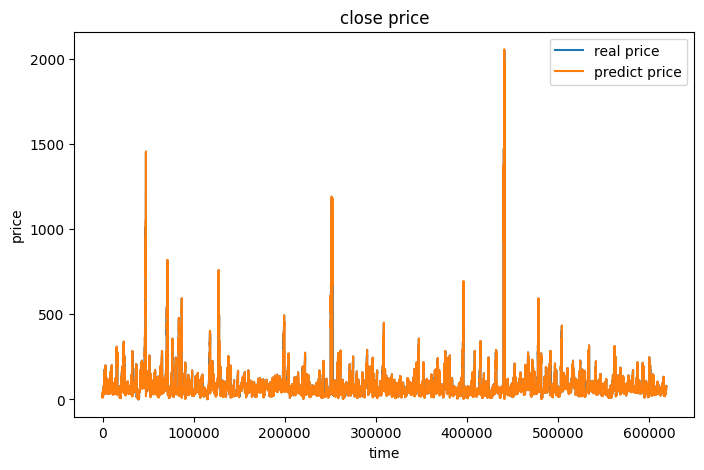

In [72]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

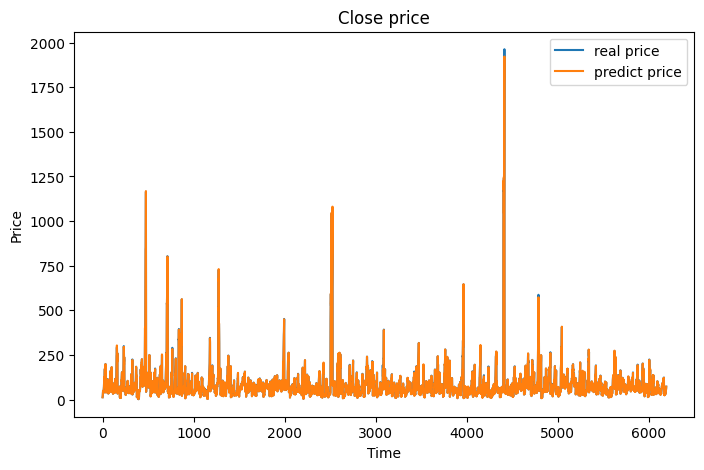

In [ ]:
fig3 = plt.figure(figsize=(8, 5))
plt.plot(y_train[::100], label='real price')  # 每隔100个点绘制
plt.plot(y_train_predict[::100], label='predict price')  # 每隔100个点绘制
plt.title("Close price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


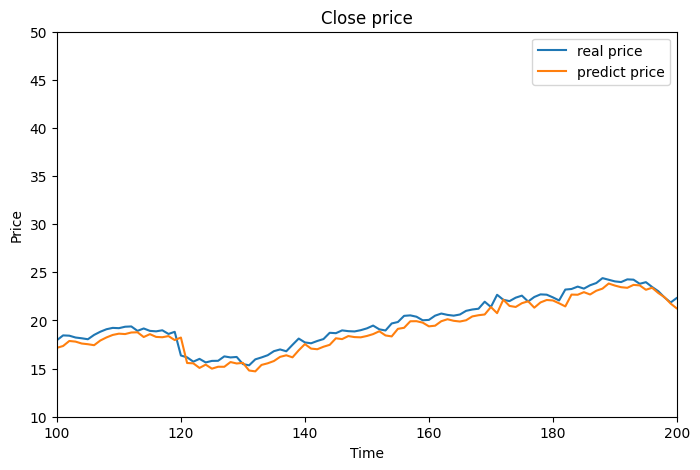

In [ ]:
fig4 = plt.figure(figsize=(8, 5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title("Close price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.xlim(100, 200)  # x 轴范围
plt.ylim(10, 50)    # y 轴范围
plt.legend()
plt.show()


In [77]:
#Make predictions based on the test data
y_test_predict = model.predict(X_test) * max(price)
y_test = [i*max(price) for i in y_test]


3869/3869 [==============================] - 1s 300us/step


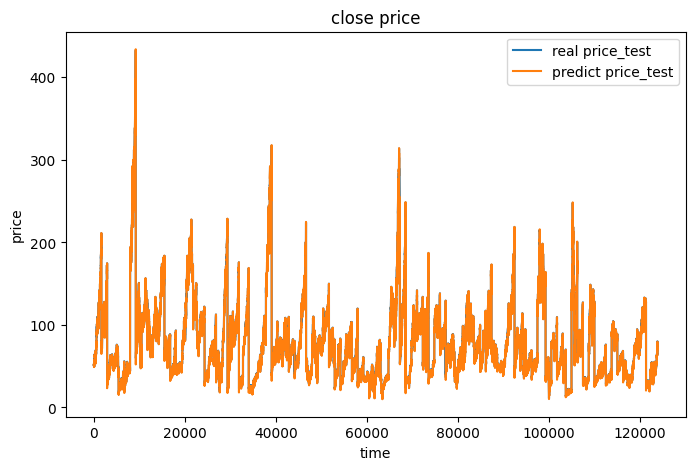

In [78]:
fig5 = plt.figure(figsize=(8,5))
plt.plot(y_test, label='real price_test')
plt.plot(y_test_predict, label='predict price_test')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

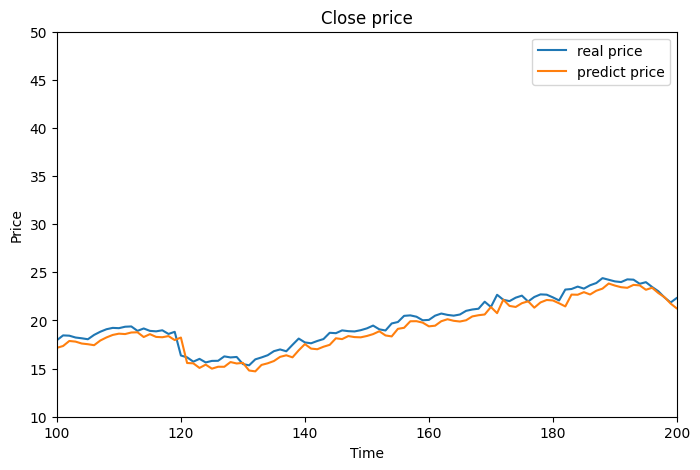

In [96]:
fig4 = plt.figure(figsize=(8, 5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title("Close price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.xlim(100, 200)  # x 轴范围
plt.ylim(10, 50)    # y 轴范围
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_train_predict)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 23.440847396850586


In [107]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, y_train_predict)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_train, y_train_predict)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.0783569812774658
Root Mean Squared Error (RMSE): 4.841574888076253
R-Squared (R²): 0.997528612613678


In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 预测测试集数据
y_test_predict = model.predict(X_test)

# 计算误差指标
mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

# 打印结果
print(f"Test Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-Squared (R²): {r2_test}")


3869/3869 [==============================] - 1s 332us/step
Test Set Performance:
Mean Squared Error (MSE): 8074.77392578125
Root Mean Squared Error (RMSE): 89.85974585865047
Mean Absolute Error (MAE): 77.40291595458984
R-Squared (R²): -2.8716750144958496


你的测试集误差结果显示，模型在测试数据上的表现**远差于训练集**，可能存在严重的**过拟合问题**或**数据问题**。让我们分析一下：

---

### **1. 结果分析**
| 指标 | 训练集 | 测试集 | 说明 |
|------|--------|--------|------|
| **MSE** | 23.44 | **8074.77** | 测试集误差远大于训练集，说明模型泛化能力差。 |
| **RMSE** | 4.84 | **89.86** | 预测误差从 4.84 **暴增** 到 89.86，说明模型在测试数据上预测效果很差。 |
| **MAE** | 1.08 | **77.40** | 误差增大，说明模型无法准确预测测试数据。 |
| **R²** | 0.9975 | **-2.87** | 负值表示模型比**简单的均值预测还差**，几乎没有学习到测试数据的规律。 |

---

### **2. 可能的问题**
你的模型在训练集上表现**极好（R² ≈ 1）**，但在测试集上**崩溃（R² < 0）**，说明可能存在以下问题：

#### **(1) 过拟合**
- 训练集上表现极好，测试集上表现很差，是**典型的过拟合**。
- 可能原因：
  - **模型太复杂**（太多 LSTM/GRU 层，参数过多）。
  - **训练数据量太小**，导致模型只记住训练数据而不是学习模式。
  - **缺乏正则化**（如 Dropout、L2 正则化）。
  - **训练时间过长**，导致模型记住训练数据但不泛化。

#### **(2) 训练集和测试集分布不同**
- 如果测试集的分布和训练集有很大不同，模型无法正确预测。
- 可能原因：
  - **数据预处理不同**：检查 `X_train` 和 `X_test` 是否使用相同的归一化/标准化方法。
  - **时间序列问题**：如果训练数据来自过去，而测试数据来自较新的时间段，市场环境可能已经变化。
  - **存在异常值**：如果测试集有极端值，可能会导致误差激增。

---

### **3. 解决方案**
✅ **(1) 增加正则化，防止过拟合**
- 在 LSTM/GRU 层中添加 **Dropout**，防止模型对训练数据过拟合：
  ```python
  from tensorflow.keras.layers import LSTM, Dropout

  model.add(LSTM(50, return_sequences=True))
  model.add(Dropout(0.2))  # Dropout 20%
  model.add(LSTM(50))
  model.add(Dropout(0.2))  # Dropout 20%
  ```
- 添加 **L2 正则化**：
  ```python
  from tensorflow.keras.regularizers import l2

  model.add(LSTM(50, kernel_regularizer=l2(0.001)))
  ```

✅ **(2) 获取更多训练数据**
- 如果训练数据少，模型容易记住数据但不会泛化。
- 尝试使用**更多的历史数据**训练模型。

✅ **(3) 确保训练集和测试集的分布一致**
- 归一化处理（Normalization 或 Standardization）必须一致：
  ```python
  from sklearn.preprocessing import MinMaxScaler

  scaler = MinMaxScaler(feature_range=(0, 1))
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)  # 只 transform，不要 fit
  ```
- 确保训练数据和测试数据**来源相同**，防止数据分布偏差。

✅ **(4) 早停（Early Stopping）**
- 如果模型在训练集上训练太久，可能会导致过拟合，可以用 `EarlyStopping` 自动停止训练：
  ```python
  from tensorflow.keras.callbacks import EarlyStopping

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])
  ```

✅ **(5) 降低模型复杂度**
- **减少 LSTM 层数**（比如 3 层 -> 2 层）。
- **减少每层神经元数量**（比如 100 -> 50）。

---

### **4. 结论**
目前你的模型在测试集上的表现**非常糟糕（R² 负值）**，主要是**过拟合或数据问题**。建议：
1. **先检查数据预处理是否一致**（归一化方式要相同）。
2. **尝试正则化方法**（Dropout、L2 正则化）。
3. **增加数据量**，让模型学到更多有用的信息。
4. **使用 Early Stopping**，防止训练时间过长导致过拟合。
5. **降低模型复杂度**，减少 LSTM 层数和神经元数量。

试试这些优化方法后，重新训练模型，再看看测试集的结果是否改善！🚀

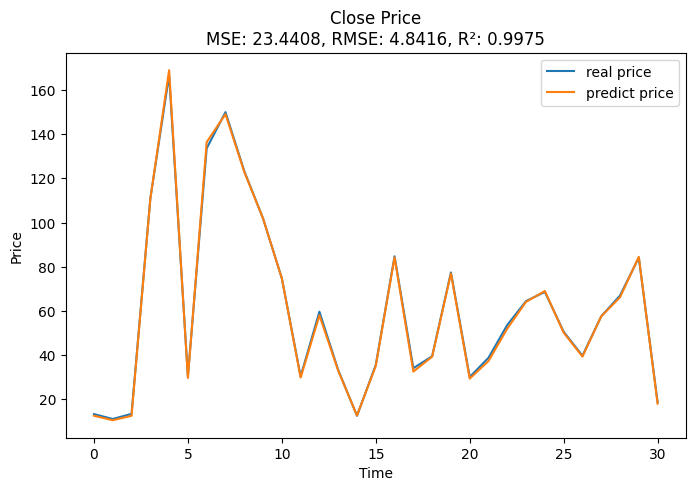

In [104]:
fig3 = plt.figure(figsize=(8, 5))
plt.plot(y_train[::20000], label='real price')  # 每隔100个点绘制
plt.plot(y_train_predict[::20000], label='predict price')  # 每隔100个点绘制
plt.title(f"Close Price\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
result_y_test = np.array(y_test).reshape(-1, 1)
result_y_test_predict = y_test_predict
print(result_y_test.shape, result_y_test_predict.shape)
result = np.concatenate((result_y_test, result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result, columns=['real_price_test','predict_price_test'])
result.to_csv('result_predict_test.csv')

Summary of RNN stock price prediction:
1. By building an RNN model, the prediction of the next day's stock price based on historical data was realized:
2. Familiar with the data format structure of the RNN model;
3. Mastered the data preprocessing method of digital sequences:
4. The predicted data was stored, and the limitations of RNN for stock price prediction were understood by visualizing local details: information delay


For learning：https://keras.io/api/layers/recurrent_layers/ <br>
Video: https://www.bilibili.com/video/BV1JP4y117mX?spm_id_from=333.788.player.switch&vd_source=6d5e118f93a0d98219382c6023b9dc07&p=5 